A1 de Linguagens de Programação – 28/09/2017
--
Professor: Renato Rocha Souza  
--

Nome do Aluno(a):

In [2]:
meu_nome = input('Entre com o seu nome completo: ')
print('Olá, {}!'.format(meu_nome))
print('Bom trabalho!')

Entre com o seu nome completo: Felipe Vieira Costa
Olá, Felipe Vieira Costa!
Bom trabalho!


In [36]:
# Somente estes módulos podem ser importados para a realização das questões
import numpy as np
import matplotlib.pyplot as plt
import requests
import random
import re
import string
from bs4 import BeautifulSoup as bs
%matplotlib inline

Questão 1 (1,5 pontos)  


Mostre graficamente (usando matplotlib) que as funções:  
$ y = 2x^2 - 10x -32$  
e  
$ y = 2x^3 - 12x^2 +4x +2$  
possuem, respectivamente, 2 e 3 raízes reais e distintas.  

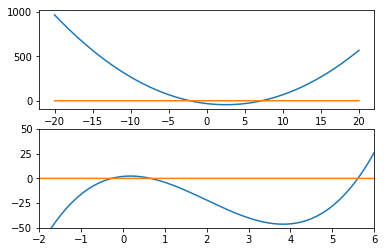

In [35]:
x = np.linspace(-20,20,10000)
y1 = [2*x**2-10*x-32 for x in x]
y2 = [2*x**3-12*x**2+4*x+2 for x in x]
zeros = [0 for i in x]
f, ax = plt.subplots(2, sharex=False)
plt.axis([-2,6,-10,10],ax[1])
plt.axis([-2,6,-50,50],ax[0])
ax[0].plot(x,y1)
ax[0].plot(x,zeros)
ax[1].plot(x,y2)
ax[1].plot(x,zeros)

plt.show()

Questão 2 (2.5 pontos)  

Partindo do código abaixo, escreva comandos para realizar as seguintes tarefas:
- Identificar as 10 palavras mais frequentes, independente de possuírem letras maiúsculas ou minúsculas;
- Identificar os trechos em que há uma citação de fala de personagens (entre aspas);
- Identificar as 5 letras mais comuns no final de palavras;
- Salvar os resultados em um arquivo chamado "respostas_q2.txt" no computador

In [5]:
url = 'http://www.releituras.com/guimarosa_margem.asp'
page = requests.get(url)
html = page.text
sopa = bs(html, "lxml")
texto = sopa.text

'\n\n\n\n\n\n\r\nfunction popUP(url,w,h){\r\nwindow.open(url,"Releituras","width="+w+",height="+h+",top=0,left=0,scrollbars=1");\r\n}\r\n\nGuimarães Rosa - A Terceira Margem do Rio\n\n\n\n\n\n\n\n\n\n\n\n\n\n[ Principal ][ Biografias ][ Releituras ][ Novos\r\n        escritores ]\n© Projeto Releituras\nArnaldo Nogueira Jr\n<!--\r\ndata = new Date();\r\ndia = data.getDate(); if(dia<10){dia = "0"+dia};\r\nmes = data.getMonth()+1; if(mes<10){mes = "0"+mes};\r\nhora = data.getHours(); if(hora<10){hora = "0"+hora};\r\nminuto = data.getMinutes(); if(minuto<10){minuto = "0"+minuto};\r\nsegundo = data.getSeconds(); if(segundo<10){segundo = "0"+segundo};\r\nano = (navigator.appName == "Netscape") ? data.getYear() + 1900 : data.getYear();\r\ndocument.writeln(dia + "/" + mes + "/" + ano + " - " + hora + ":" + minuto + ":" + segundo);\r\n -->\n\n\n\n\n\n\nGuimarães Rosa\n\n\nBiografia e Bibliografia\n\n\nMenu do Autor\n\n\n\n\n\n\n\r\n              A Terceira Margem do Rio\n\nGuimarães Rosa\n\nNos

In [ ]:
texto.findall(r'[A-Za-z]+')

Questão 3 (3 pontos)  

Christian Goldbach propos que qualquer número ímpar não primo pode ser formado pela soma de um número primo e duas vezes o quadrado de outro número.

$9 = 7 + 2×1^2$  
$15 = 7 + 2×2^2$  
$21 = 3 + 2×3^2$  
$25 = 7 + 2×3^2$  
$27 = 19 + 2×2^2$  
$33 = 31 + 2×1^2$  

A conjectura se mostrou falsa. 

Crie um programa para mostrar qual o primeiro número ímpar não primo que não pode ser escrito pela soma de um primo e duas vezes o quadrado de outro número.

In [9]:
def gera_primos(i = 2,primo = []):
    while True:
        primo.append(i)
        i += 1
        for j in primo:
            i_primo = True
            if i % j:
                continue
            else:
                i_primo = False
                break
        if i_primo == True:
            x = i
            yield i
            
ger = gera_primos()
primos = []
for i in range(5000):
    p = next(ger)
    primos.append(p)
    
squares = [2*x**2 for x in range(1,10000)]
impares = [x for x in range(3,1000000) if x%2==1 and x not in primos]
for i in impares:
    valid = False
    for p in [k for k in primos if k <= i]:
        if (i - p) in squares:
            valid = True
            break
    if valid == False:
        nosso_num = i
        break
nosso_num

Questão 4 (3 pontos) 

Vamos ajudar uma tartaruga a sair de um labirinto?  

Implemente em Python uma classe chamada “Tartaruga” com as seguintes propriedades:  

- Recebe um labirinto (array do numpy) com 0s nas células desocupadas e 1s nas células ocupadas;
- Sorteia, ao iniciar, uma posição aleatória para si neste array (representada por 2) dentre as células com 0 (não ocupadas);  
- Possui um método "andar", que recebe as ordens:
    - Norte, na qual tenta diminuir o índice da linha, mantendo o da coluna;
    - Sul, na qual tenta aumentar o índice da linha, mantendo o da coluna;
    - Leste, na qual tenta aumentar o índice da coluna, mantendo o da linha;
    - Oeste, na qual tenta diminuir o índice da coluna, mantendo o da linha;
    - Só pode andar para posições que estão ocupadas com '0'.
- Possui um método para mostrar a sua posição no labirinto;
- Deve guardar as posições que já visitou e a quantidade de vezes (com método para mostrar este array);
- Possui um método "tenta_sair" com uma estratégia:  
    - Anda para o norte, enquanto for possível; 
    - Quando não for possível andar para o norte, anda para o sul;
    - Quando não for possível andar para o norte ou o sul, anda para o leste;
    - Quando não for possível andar para o norte ou o sul ou o leste, anda para oeste;
    - Quando passar por uma célula já visitada, deve mudar a sequência de "tenta_sair" na forma:  
        NSLO -> SLON -> LONS -> ONSL -> ...  
- Deve saber a cada passo se saiu do labirinto, mostrando uma mensagem e interrompendo o processo de tentar sair;
- Caso não consiga sair em 1000 iterações, deve declarar que é impossível sair.  

In [37]:
#exemplo de labirinto

labirinto = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],
                      [1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0,1,0,0,0],
                      [1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,1,1],
                      [1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,1,1],
                      [1,0,0,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,1,1],
                      [1,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,1],
                      [1,0,1,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0,1,0,1,1],
                      [1,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,1],
                      [1,0,1,0,1,0,0,1,1,0,0,1,1,1,1,0,0,0,1,0,1,1],
                      [1,1,1,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,1,0,0,1],
                      [1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,1],
                      [1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,1,1,1,1,1,0,1],
                      [1,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,1,1,1,1,0,1],
                      [1,0,1,0,1,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1],
                      [1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,1,0,1,1,0,1],
                      [1,0,1,1,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1,0,1],
                      [1,0,1,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,0,1],
                      [1,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,1,1,1,1,0,1],
                      [1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,1,1,0,0,1,0,1],
                      [1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1],
                      [1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1],
                      [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1]], dtype=float)

labirinto.shape

(22, 22)

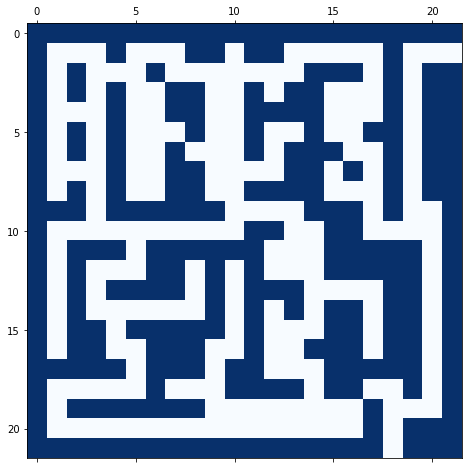

In [65]:
fig, ax = plt.subplots(figsize = (8,8))
ax.matshow(labirinto, cmap=plt.cm.Blues)

In [43]:
class Tartaruga:
    def __init__(self,labirinto):
        self.labirinto = labirinto
        vazios = [(x,y) for x in range(22) for y in range(22) if self.labirinto[x,y]==0]
        a = random.randint(0,len(vazios))
        self.labirinto[vazios[a][0],vazios[a][1]] = 2
        self.posicao = [vazios[a][0],vazios[a][1]]
    
    def andar(self):
        def andar_pro_norte(self):
            if self.labirinto[self.posicao[0]-1,self.posicao[0]] == 0:
                return True
            else:
                return False
        def andar_pro_sul(self):
            if self.labirinto[self.posicao[0]+1,self.posicao[0]] == 0:
                return True
            else:
                return False
        def andar_pro_leste(self):
            if self.labirinto[self.posicao[0],self.posicao[0]+1] == 0:
                return True
            else:
                return False
        def andar_pro_oeste(self):
            if self.labirinto[self.posicao[0],self.posicao[0]-1] == 0:
                return True
            else:
                return False
            
        def mostra_posicao(self):
            print(self.posicao)
        
        self.strategyA = ['N',S,L,O]
        self.strategyB = [S,L,O,N]
                
        


0.0

In [55]:
[(x,y) for x in range(22) for y in range(22) if x+y==5]

[(0, 5), (1, 4), (2, 3), (3, 2), (4, 1), (5, 0)]

Questão Bônus (0,5 pontos)  

O problema de Monty Hall, também conhecido por paradoxo de Monty Hall é um problema matemático e paradoxo que surgiu a partir de um concurso televisivo dos Estados Unidos chamado "Let’s Make a Deal", exibido na década de 1970. O jogo consiste no seguinte: Monty Hall (o apresentador) apresentava 3 portas aos concorrentes, sabendo que atrás de uma delas está um carro (prêmio bom) e que as outras têm prêmios de pouco valor.

- Na 1ª etapa o concorrente escolhe uma porta (que ainda não é aberta);  
- Em seguida, Monty abre uma das outras duas portas que o concorrente não escolheu, sabendo de antemão que o carro não se encontra na porta que abrirá;  
- Agora com duas portas apenas para escolher — pois uma delas já se viu, na 2ª etapa, que não tinha o prêmio — e sabendo que o carro está atrás de uma delas, o concorrente tem que se decidir se permanece com a porta que escolheu no início do jogo e abre-a ou se muda para a outra porta que ainda está fechada para então a abrir.  

Demonstre graficamente que é mais provável ganhar o prêmio se trocar de porta do que se não o fizer. Quais as probabilidade de acertar, em ambos os casos?

In [ ]:
#seu código aqui

3